# Tratativa dos dados
---

## Importando bibliotecas necessárias 
---

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

## Configurações das bibliotecas
---


In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option( 'display.max_columns', 100)

warnings.filterwarnings('ignore')

plt.rcParams['Figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

## Exploração dos dados
---

In [9]:
dados = pd.read_csv('./data/house_data.csv')
print(f'Dimensão do dataset -> {dados.shape}')
dados.head()

Dimensão do dataset -> (10692, 13)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [11]:
dados = dados.drop(columns= ['fire insurance (R$)', 'total (R$)'])
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [16]:
dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [13]:
dados.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [14]:
dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

## Exploração Análitica (EDA)
---

In [17]:
# Filtrar os tipos de colunas
colunas_categoricas = dados.columns[dados.dtypes == object]
colunas_numericas = dados.columns[dados.dtypes != object]


colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

### Análise dos campos categóricos
---

In [24]:
for coluna in colunas_categoricas:
    analise_coluna = dados[coluna].value_counts(normalize=True) * 100
    print(f'\nColuna: {coluna}')
    print(analise_coluna)


Coluna: city
city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: proportion, dtype: float64

Coluna: floor
floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: proportion, dtype: float64

Coluna: animal
animal
acept        77.777778
not acept    22.222222
Name: proportion, dtype: float64

Coluna: furniture
furniture
not furnished    75.626637
f

In [31]:
# Correção dos dados 

# Ajustando o andar
dados.loc[dados.floor == '301']
dados.iloc[2562, 5] = 30

# Ajustar o '-'
dados.floor = dados.floor.apply(lambda registro: 0 if registro == '-' else registro)
dados.floor = pd.to_numeric(dados.floor)

dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                 int64
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

### Análise dos campos numéricos
---

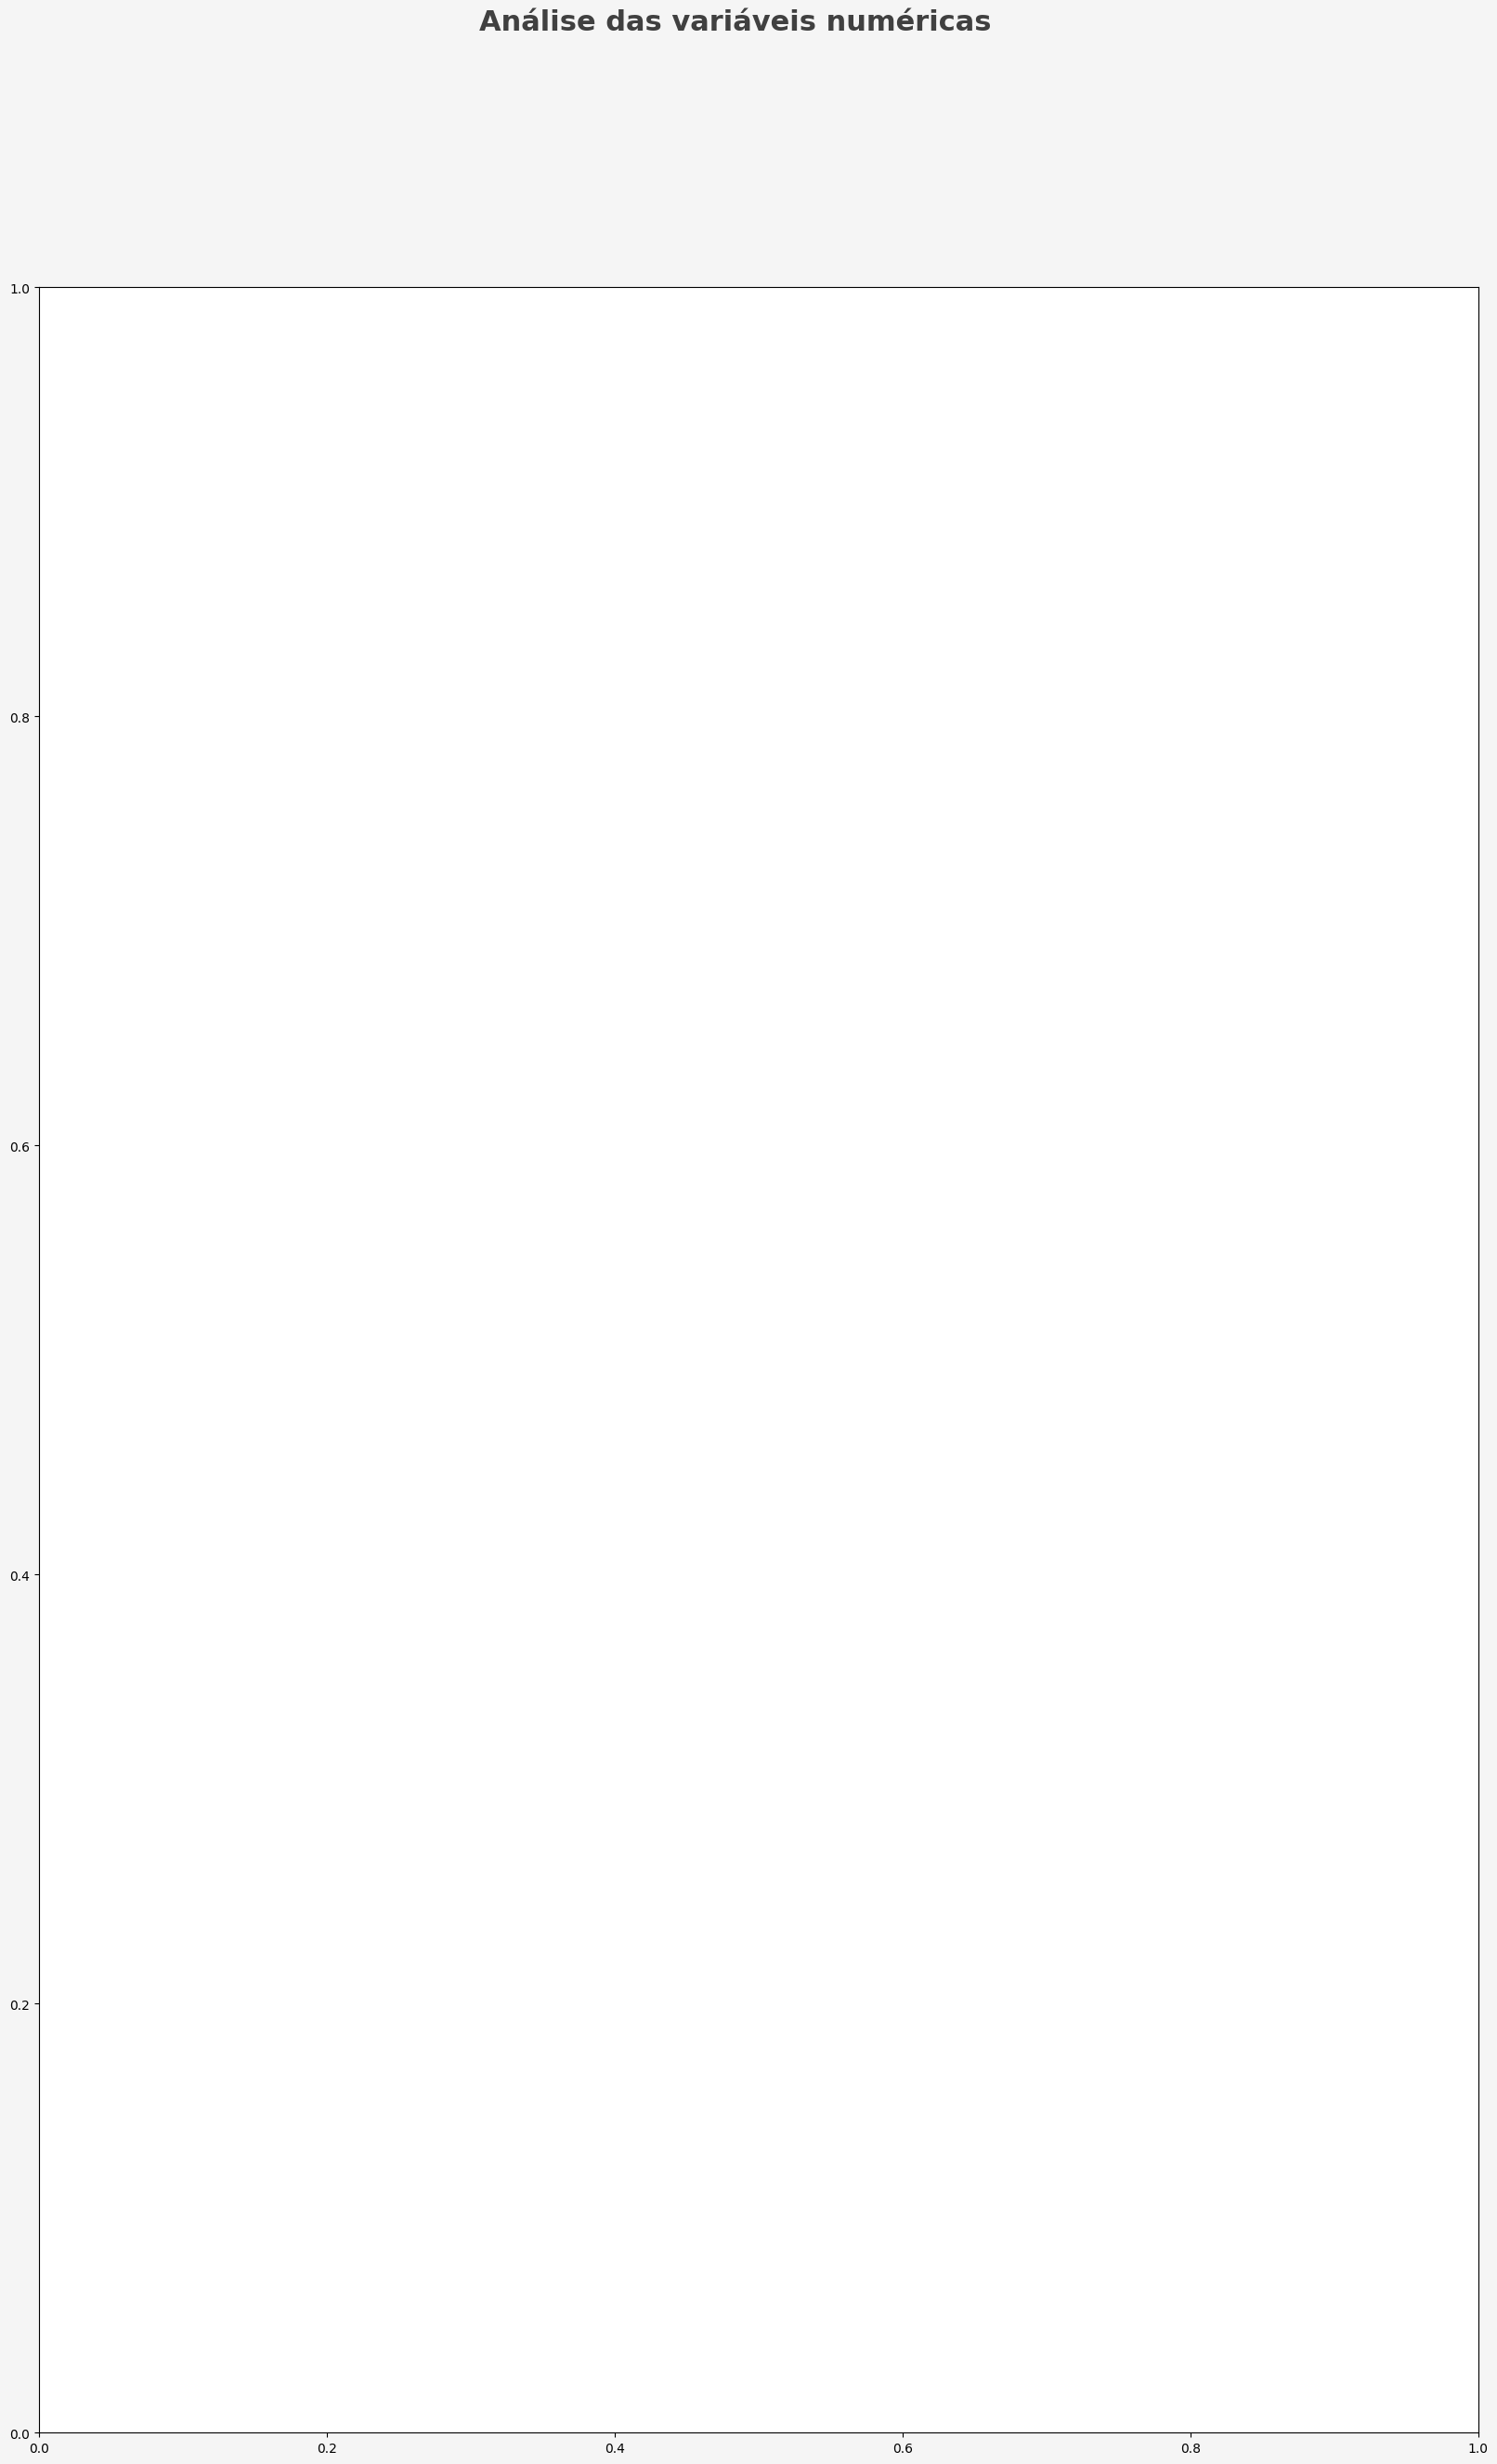

In [39]:
figura, eixo = plt.subplots(figsize=(20, 30))

cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

paleta_de_cores = sns.color_palette('flare', len(colunas_numericas) * 2)

plt.suptitle("Análise das variáveis numéricas", fontsize=22, color="#404040", fontweight=600)

linhas = 7    # Quantidade de colunas presentes nas colunas numéricas
colunas =  2  # (boxplot - distplot)
posicao = 1   # Posição inicial do grid


for coluna in colunas_numericas:
    # plot do boxplot
    plt.subplot(linhas, colunas, posicao)
    
    posicao += 1
    # plot do distplot
    plt.subplot(linhas, colunas, posicao)
    posicao += 1
    
    
plt.subplots_adjust(top=0.95, hspace=0.3)